In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join, Column
import re
from tqdm.notebook import tqdm
from scikitplot.metrics import plot_confusion_matrix
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


plt.rcParams['figure.figsize'] = (20, 10)

In [8]:
IB_filters = [
    'TU_FNU_IB427_SUBARU',
    #'TU_FNU_IB464_SUBARU',
    #'TU_FNU_IB484_SUBARU',
    #'TU_FNU_IB505_SUBARU',
    'TU_FNU_IB527_SUBARU',
    #'TU_FNU_IB574_SUBARU',
    #'TU_FNU_IB624_SUBARU',
    #'TU_FNU_IB679_SUBARU',
    'TU_FNU_IB709_SUBARU',
    #'TU_FNU_IB738_SUBARU',
    #'TU_FNU_IB767_SUBARU',
    'TU_FNU_IB827_SUBARU',
]

In [3]:
true_photo = Table.read('/home/aalvarez/Work/Data/SC8/TU/Galaxies/Wide/IB_2740.fits', hdu=1)
true_photo.rename_column('SOURCE_ID', 'OBJECT_ID')

In [4]:
test_table = Table.read('/home/aalvarez/Work/Data/GalaxySeds/galsed_ebv.fits')

In [12]:
def plot_bands(catalog):
    ncols = 2
    nrows = len(IB_filters) // 2

    fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=(20, 10))
    for f, ax in zip(IB_filters, axes.ravel()):
        fname = 'Subaru/' + f.split('_')[2] + '_MEAN'
        g0 = catalog[f] > 0
        
        ax.set_title(fname)
        ratio = (catalog[fname] / (catalog[f] * 1e6))
              
        good = catalog['FLAGS_1'] == 0
        mean_all = np.nanmean(ratio)
        std_all = np.nanstd(ratio)
        mean_good = np.nanmean(ratio[good])
        std_good = np.nanstd(ratio[good])
                
        ax.scatter(catalog[f][g0], ratio[g0], marker='1', alpha=0.4,
                   label=f'All {len(catalog)} ($\mu$ {mean_all:.2f}, $\sigma$ {std_all:.2f})')
        ax.scatter(catalog[f][good & g0], ratio[good & g0], marker='.',
                   label=f'Not flagged {good.sum()} ($\mu$ {mean_good:.2f}, $\sigma$ {std_good:.2f})')
        ax.axhline(1, linestyle='--', color='red')
        
        ax.set_xlabel('uJy')
        ax.set_ylabel('$\\dfrac{F_\mu}{F}$')
        ax.set_xscale('log')
        ax.set_ylim(-0.5, 2.5)

        ax.legend()
    plt.tight_layout()

# NNPZ with Combined (Euclidean + Chi2)

In [13]:
combined_matched = join(true_photo, test_table, 'OBJECT_ID')

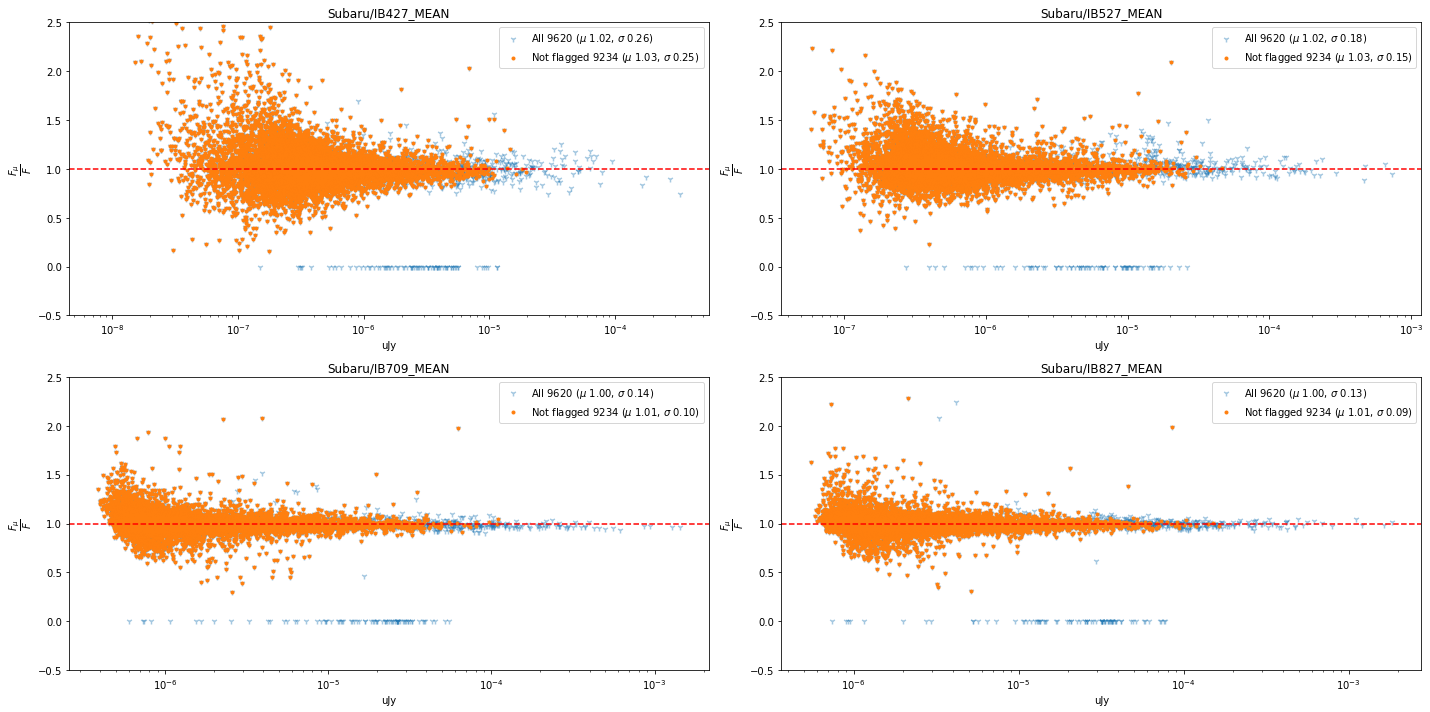

In [14]:
plot_bands(combined_matched)